In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

In [2]:
DATA_FILE = '../stanford-tensorflow-tutorials/data/fire_theft.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1
print(n_samples)

42


In [3]:
# Create placeholder for X (Number of Fire) and Y (Number of Theft)
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

In [4]:
# Create weight and bias initialized to 0
w2 = tf.Variable(0.0, name="w2")
w1 = tf.Variable(0.0, name="w1")
b = tf.Variable(0.0, name="b")

In [5]:
# Construct model to predict Y (Number of Theft)
Y_predicted = X * X * w2 + X * w1 + b

In [6]:
# Calculated squared error as loss
loss = tf.square(Y - Y_predicted, name = "loss")

In [7]:
# Use Gradient Descent with learning rate=0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001)

In [8]:
lossOptimizer = optimizer.minimize(loss)

In [9]:
def run_model():
    # run the model
    with tf.Session() as sess:
        # Initialize necessary variables, in this case w and b
        sess.run(tf.global_variables_initializer())

        writer = tf.summary.FileWriter('./graphs', sess.graph)

        # train the model
        for i in range(100): # run 100 epochs
            total_loss = 0
            for x,y in data:
                # session runs train_op to minimize loss
                _, l = sess.run([lossOptimizer, loss], {X:x, Y:y})
                print(l)
                total_loss += l
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

        w2_value, w1_value, b_value= sess.run([w2, w1, b])

    return w2_value, w1_value, b_value

In [10]:
w2_value, w1_value, b_value = run_model()

841.0
1934.2
1287.85
1360.97
2791.19
4156.18
5301.43
290.757
895.808
414.71
256.742
192.7
104.369
118.845
477.29
243.696
691.24
78.8531
769.213
594.848
1088.93
514.665
8.9131
10010.2
0.962
19.0409
1362.34
442.789
653.888
9.63959
1164.24
201.831
928.645
516.672
216.206
706.588
266.164
1419.2
1252.79
1299.68
719.515
308.368
Epoch 0: 1093.17097039
707.565
1471.57
843.171
1102.99
2327.79
52.5761
4536.15
222.122
757.793
102.607
463.621
187.516
80.5128
115.474
466.775
224.887
633.8
75.5508
663.362
247.236
518.144
103.032
1967.32
3930.07
9.6794
114.373
1243.95
428.276
946.383
3.10467
1109.35
198.08
913.257
952.816
146.121
649.965
262.885
1330.14
1187.63
1230.97
667.827
301.513
Epoch 1: 797.570239095
690.359
1413.97
790.391
1070.18
2268.42
284.508
4437.38
213.507
739.944
76.5856
705.963
186.784
77.49
114.995
465.3
222.347
626.127
75.0869
649.562
211.881
457.304
71.6435
2570.27
3327.75
13.4403
133.377
1228.1
426.211
990.04
5.85523
1101.79
197.515
911.021
1021.5
137.636
642.297
262.376
1318.04
1

7.02768
1092.73
195.724
905.908
1035.23
133.103
634.479
260.432
1306.52
1168.65
1211.23
653.178
297.72
Epoch 25: 794.803591512
682.699
1395.81
775.075
1057.95
2248.11
333.015
4404.17
209.177
731.363
70.4414
748.798
185.533
75.4522
114.098
463.07
219.916
620.619
74.2947
642.05
202.578
442.372
65.1919
2651.92
3263.81
15.3468
139.744
1215.29
422.148
1005.75
7.05767
1092.39
195.65
905.701
1035.35
132.963
634.191
260.351
1306.1
1168.27
1210.84
652.894
297.606
Epoch 26: 794.646196842
682.49
1395.42
774.771
1057.65
2247.64
332.848
4403.42
209.051
731.12
70.3399
748.828
185.486
75.3868
114.064
462.986
219.831
620.439
74.2647
641.826
202.409
442.129
65.1051
2651.13
3264.86
15.401
139.882
1214.86
421.992
1006.12
7.08764
1092.04
195.576
905.493
1035.48
132.822
633.902
260.269
1305.68
1167.9
1210.46
652.611
297.492
Epoch 27: 794.488867964
682.282
1395.03
774.468
1057.35
2247.17
332.682
4402.67
208.926
730.877
70.2385
748.86
185.438
75.3214
114.029
462.903
219.746
620.259
74.2347
641.601
202.24
441

1014.64
7.79235
1084.19
193.882
900.744
1038.35
129.626
627.312
258.413
1296.06
1159.28
1201.63
646.125
294.883
Epoch 50: 790.896208445
677.502
1386.12
767.524
1050.49
2236.5
328.906
4385.47
206.066
725.316
67.9336
749.577
184.353
73.8308
113.245
460.991
217.805
616.137
73.5486
636.468
198.387
436.33
63.0446
2632.25
3289.82
16.7252
143.212
1204.55
418.269
1015.01
7.8236
1083.85
193.809
900.539
1038.47
129.488
627.027
258.332
1295.65
1158.9
1201.25
645.845
294.77
Epoch 51: 790.741177718
677.295
1385.73
767.223
1050.19
2236.04
328.742
4384.73
205.943
725.075
67.8347
749.608
184.306
73.7665
113.211
460.908
217.721
615.959
73.519
636.246
198.221
436.09
62.9598
2631.47
3290.86
16.7814
143.351
1204.13
418.115
1015.38
7.85496
1083.51
193.736
900.334
1038.6
129.351
626.743
258.252
1295.23
1158.53
1200.86
645.565
294.658
Epoch 52: 790.586185115
677.089
1385.35
766.924
1049.89
2235.57
328.58
4383.98
205.819
724.835
67.7358
749.64
184.259
73.7024
113.177
460.826
217.637
615.781
73.4893
636.024
19

8.55758
1076.09
192.135
895.838
1041.33
126.355
620.521
256.496
1286.14
1150.38
1192.52
639.44
292.193
Epoch 74: 787.201011885
672.568
1376.91
760.363
1043.4
2225.46
325.014
4367.69
203.124
719.577
65.5864
750.321
183.231
72.3021
112.434
459.014
215.802
611.881
72.8412
631.172
194.434
430.611
61.0321
2613.58
3314.7
18.0938
146.555
1194.36
414.59
1023.87
8.59016
1075.75
192.063
895.634
1041.45
126.22
620.239
256.417
1285.73
1150.01
1192.14
639.164
292.081
Epoch 75: 787.048228786
672.364
1376.53
760.066
1043.11
2225.01
324.853
4366.96
203.002
719.339
65.4898
750.352
183.185
72.239
112.401
458.933
215.719
611.705
72.8119
630.953
194.271
430.375
60.9491
2612.81
3315.74
18.1517
146.695
1193.94
414.437
1024.23
8.62272
1075.42
191.991
895.431
1041.57
126.086
619.959
256.337
1285.32
1149.64
1191.76
638.887
291.97
Epoch 76: 786.895540987
672.159
1376.15
759.77
1042.82
2224.55
324.692
4366.22
202.88
719.102
65.3935
750.382
183.139
72.176
112.367
458.851
215.636
611.528
72.7826
630.733
194.108
43

182.168
70.8625
111.666
457.138
213.905
607.845
72.1711
626.153
190.71
425.205
59.1474
2595.88
3338.46
19.4458
149.772
1184.71
411.104
1032.33
9.35269
1068.07
190.409
890.98
1044.29
123.15
613.815
254.6
1276.33
1141.58
1183.51
632.839
289.534
Epoch 98: 783.559839975
667.688
1367.81
753.287
1036.4
2214.54
321.175
4350.08
200.224
713.903
63.2972
751.058
182.122
70.8004
111.633
457.056
213.823
607.671
72.1422
625.936
190.55
424.972
59.0665
2595.11
3339.49
19.5055
149.913
1184.29
410.953
1032.7
9.38648
1067.74
190.338
890.778
1044.41
123.018
613.538
254.522
1275.92
1141.22
1183.13
632.565
289.424
Epoch 99: 783.409252394


In [11]:
print(w2_value)
print(w1_value)
print(b_value)

0.0689519
0.0806979
0.0134163


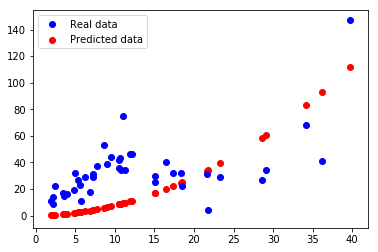

In [12]:
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.scatter(X, X * X  * w2_value + X * w1_value + b_value, color='r', label='Predicted data')
plt.legend()
plt.show()

By reusing the exact code as in linear model the model returns nan. 
By investigating and printing loss value at each record I noticed that in the beginning we have loss but it keeps increasing. Tried smaller and larger loss, no help; smaller loss seemed to work for a few more samples but nothing significant. By looking at this https://stackoverflow.com/questions/45177800/gradient-descent-isnt-working I noticed that loss should be MUCH MUCH smaller than linear model.
![title](img/exploding_loss.jpg)
